In [3]:
# ============================================
# 🛒 CUSTOMER SEGMENTATION – SIMPLE K-MEANS
# ============================================

# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv(r"C:\Users\kajal panigrahi\Downloads\INTERNSHIP\TECHNEST INTERN\Mall_Customers.csv")


In [5]:
# 3️⃣ Prepare Data
data = df.drop(columns=['CustomerID'])        # Remove ID column
data = pd.get_dummies(data, drop_first=True)  # Convert Gender to numbers
scaled = StandardScaler().fit_transform(data) # Scale all features

In [21]:
# 4️⃣ Elbow Method to find best k
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")


wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    wcss.append(km.inertia_)

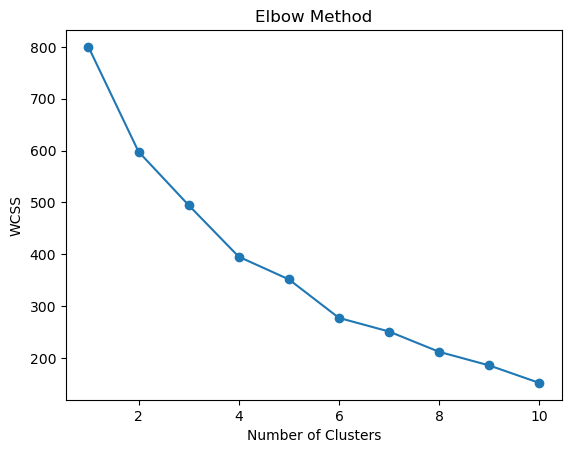

In [11]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [23]:
# 5️⃣ Apply K-Means (let's choose k=4 from elbow method)
km = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = km.fit_predict(scaled)

In [29]:
# 6️⃣ Name Clusters (based on Income & Spending Score)
summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
avg_income = summary['Annual Income (k$)'].mean()
avg_spend = summary['Spending Score (1-100)'].mean()
names = {}
for i, row in summary.iterrows():
    if row['Annual Income (k$)'] > avg_income and row['Spending Score (1-100)'] > avg_spend:
        names[i] = "High Income - High Spend"
    elif row['Annual Income (k$)'] <= avg_income and row['Spending Score (1-100)'] > avg_spend:
        names[i] = "Low Income - High Spend"
    elif row['Annual Income (k$)'] > avg_income and row['Spending Score (1-100)'] <= avg_spend:
        names[i] = "High Income - Low Spend"
    else:
        names[i] = "Low Income - Low Spend"

df['Cluster_Label'] = df['Cluster'].map(names)


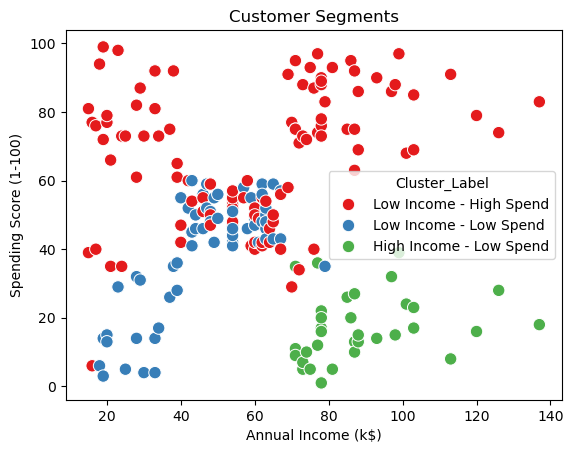

In [31]:
# 7️⃣ Plot Clusters
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_Label',
    palette='Set1',
    s=80
)
plt.title("Customer Segments")
plt.show()

In [33]:
# 8️⃣ Show Cluster Summary
print("\nCluster Summary:")
print(df.groupby('Cluster_Label').mean(numeric_only=True))


Cluster Summary:
                         CustomerID        Age  Annual Income (k$)  \
Cluster_Label                                                        
High Income - Low Spend  164.529412  41.264706           88.500000   
Low Income - High Spend   98.481132  29.103774           59.330189   
Low Income - Low Spend    67.783333  54.700000           46.900000   

                         Spending Score (1-100)   Cluster  
Cluster_Label                                              
High Income - Low Spend               16.764706  1.000000  
Low Income - High Spend               66.735849  2.603774  
Low Income - Low Spend                39.933333  0.000000  
